In [1]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
warnings.filterwarnings('ignore')

In [3]:
DATASET_DIR = r"/home/paradox/Documents/github-deaxparadox/ArtOfAI/datasets/spaceship-titanic-1"
TEST_DATASET = os.path.join(DATASET_DIR, "test.csv")
TRAIN_DATASET = os.path.join(DATASET_DIR, "train.csv")
SAMPLE_SUBMISSION_DATASET = os.path.join(DATASET_DIR, "sample_submission.csv")

### Reading the CSV files

In [4]:
train_df = pd.read_csv(TRAIN_DATASET)
test_df = pd.read_csv(TEST_DATASET)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [10]:
def bool_to_int(val):
    if val == True:
        return 1
    elif val == False:
        return 0
    else:
        return val
    
cols = ['CryoSleep', 'VIP', 'Transported']
for col in cols:
    train_df[col] = train_df[col].apply(bool_to_int)
    
cols = ['CryoSleep', 'VIP']
for col in cols:
    test_df[col] = test_df[col].apply(bool_to_int)
    
    

In [11]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [12]:
train_df['CryoSleep'].dtype

dtype('float64')

In [13]:
anal_num = ['Age', 'RoomService', "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
anal_cat = ["Transported", "HomePlanet", "CryoSleep", "Destination", "VIP"]
label = 'Transported'

In [14]:
def cal_col_anal(df, target, col, plot=False):
    print("")
    print(
        pd.DataFrame(
            {
                col: df[col].value_counts(), 
                'ratio': 100*df[col].value_counts()/len(df)
            }
        )
    )
    print("")
    sns.countplot(data=df, x=col, hue=target)
    plt.show(block=True)
    
    if target != col:
        print(pd.DataFrame({'Target_Mean': df.groupby(col)[target].mean()}))
        print('')
    
        if plot:
            sns.barplot(data=df, x=col, y=target)
            plt.show(block=True)

    print('#'*80)
    


             Transported      ratio
Transported                        
1                   4378  50.362361
0                   4315  49.637639



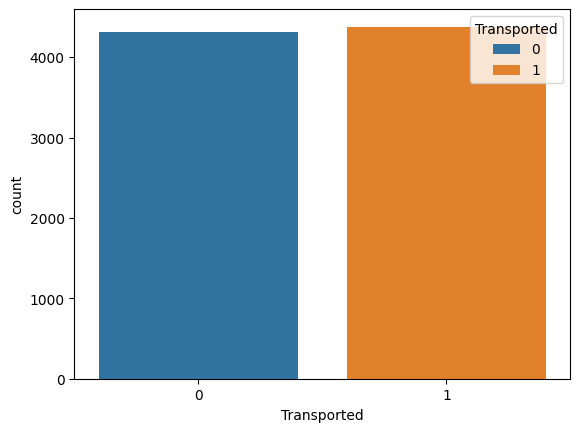

################################################################################

            HomePlanet      ratio
HomePlanet                       
Earth             4602  52.939146
Europa            2131  24.513977
Mars              1759  20.234672



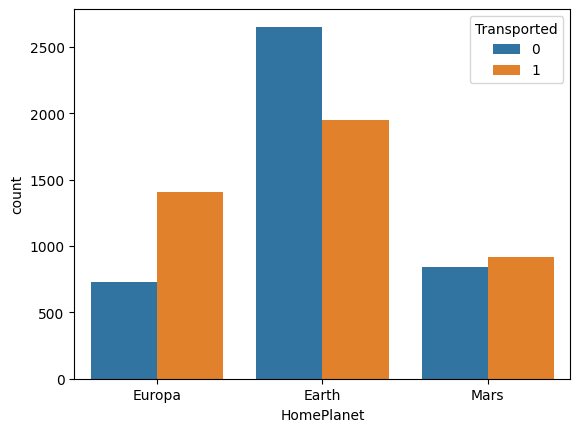

            Target_Mean
HomePlanet             
Earth          0.423946
Europa         0.658846
Mars           0.523024



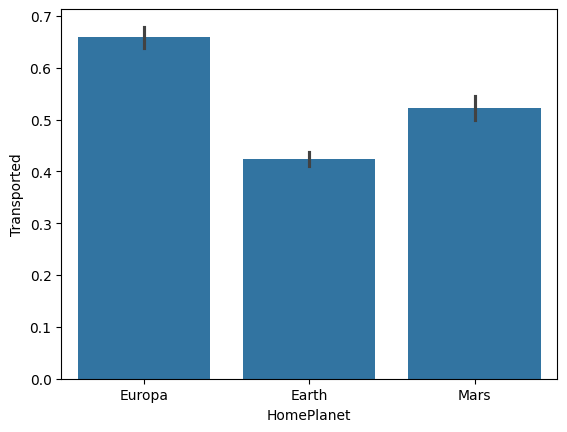

################################################################################

           CryoSleep      ratio
CryoSleep                      
0.0             5439  62.567583
1.0             3037  34.936156



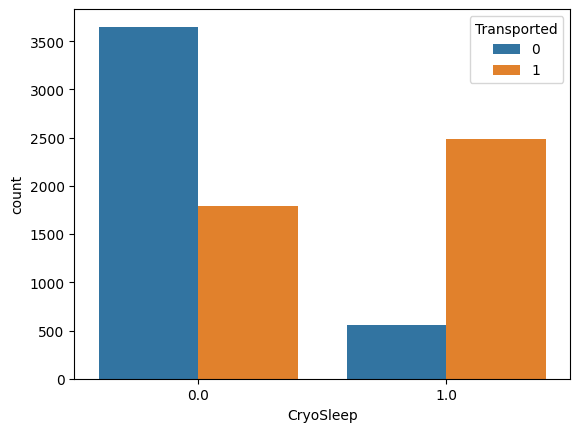

           Target_Mean
CryoSleep             
0.0           0.328921
1.0           0.817583



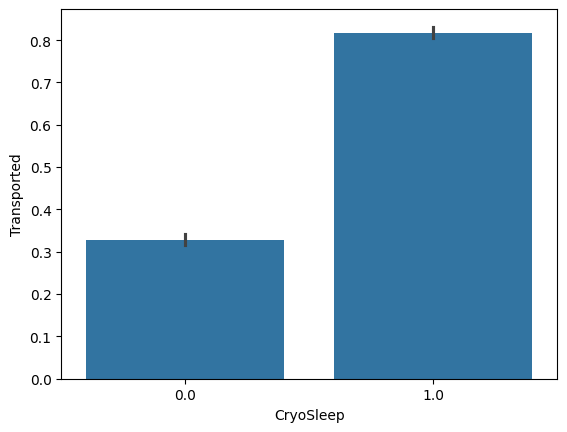

################################################################################

               Destination      ratio
Destination                          
TRAPPIST-1e           5915  68.043253
55 Cancri e           1800  20.706315
PSO J318.5-22          796   9.156793



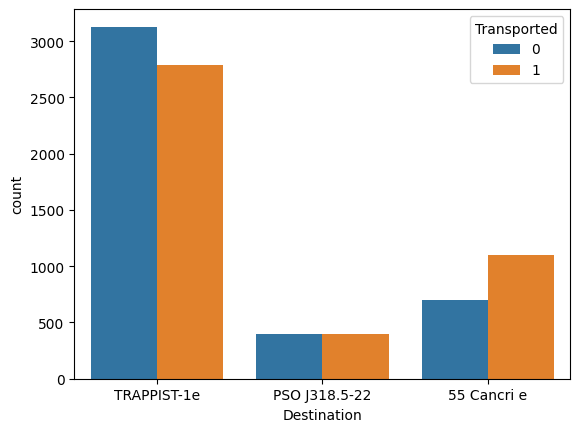

               Target_Mean
Destination               
55 Cancri e       0.610000
PSO J318.5-22     0.503769
TRAPPIST-1e       0.471175



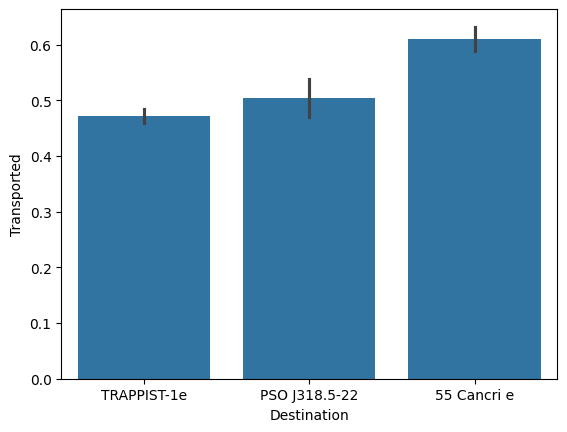

################################################################################

      VIP      ratio
VIP                 
0.0  8291  95.375590
1.0   199   2.289198



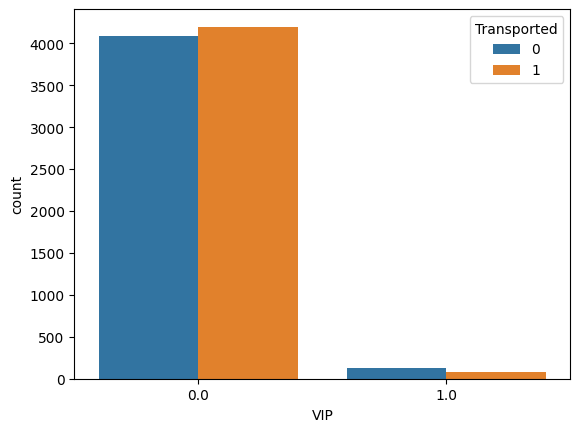

     Target_Mean
VIP             
0.0     0.506332
1.0     0.381910



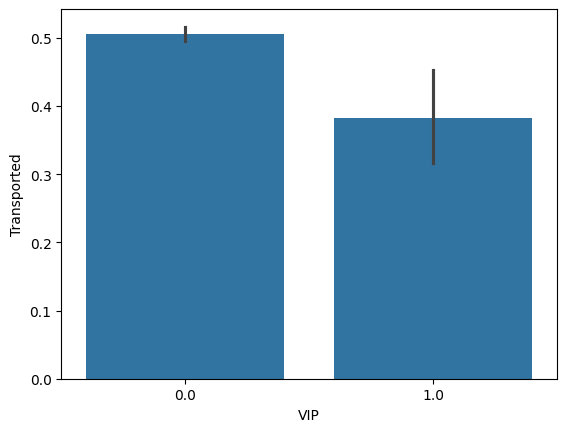

################################################################################


In [15]:
for col in anal_cat:
    cal_col_anal(train_df, label, col, plot=True)

In [16]:
def num_col_anal(df, target, col, plot=False):
    print(col)
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    print(df[col].describe(quantiles).T)
    
    sns.histplot(data=df, x=col, bins=30, multiple='stack', hue=target)
    plt.title(col)
    plt.show(block=True)
    
    if target != col:
        print("")
        print(pd.DataFrame({col+"_Mean": df.groupby(target)[col].mean()}))
        print("")
        
        if plot:
            sns.barplot(data=df, x=target, y=col)
            plt.show(block=True)
    print('#'*80)

In [17]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Age
count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
5%          4.000000
10%        13.000000
20%        18.000000
30%        21.000000
40%        24.000000
50%        27.000000
60%        31.000000
70%        35.000000
80%        41.000000
90%        49.000000
95%        56.000000
99%        65.000000
max        79.000000
Name: Age, dtype: float64


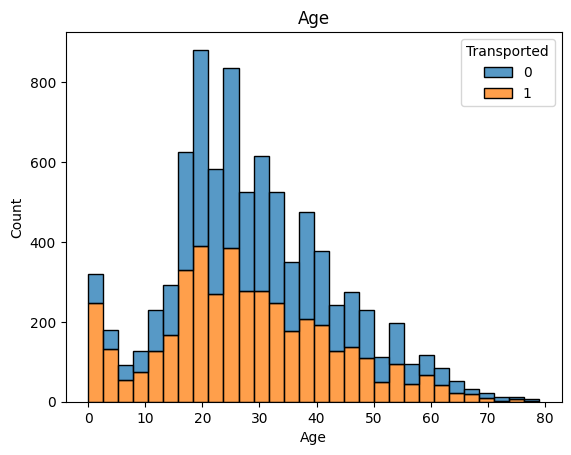


              Age_Mean
Transported           
0            29.922858
1            27.748834



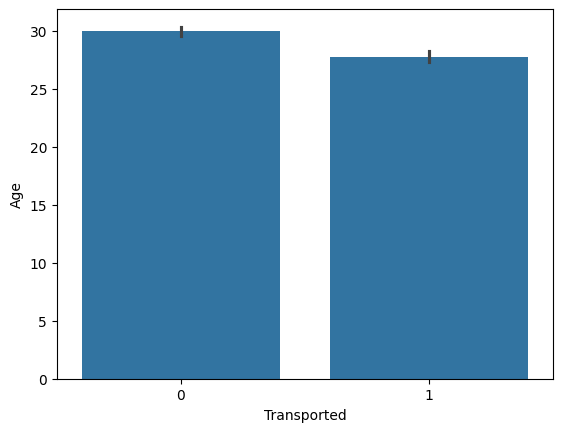

################################################################################
RoomService
count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          8.000000
80%        175.600000
90%        753.000000
95%       1274.250000
99%       3096.230000
max      14327.000000
Name: RoomService, dtype: float64


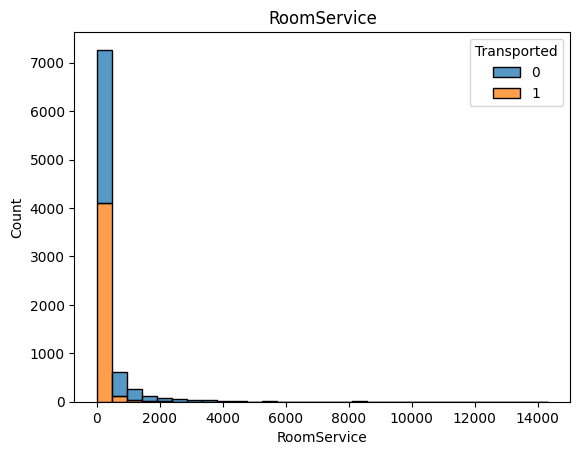


             RoomService_Mean
Transported                  
0                  389.266066
1                   63.098021



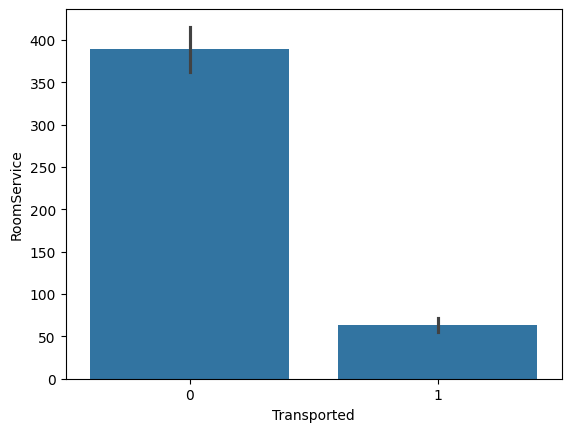

################################################################################
FoodCourt
count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%         13.000000
80%        258.000000
90%       1026.000000
95%       2748.500000
99%       8033.310000
max      29813.000000
Name: FoodCourt, dtype: float64


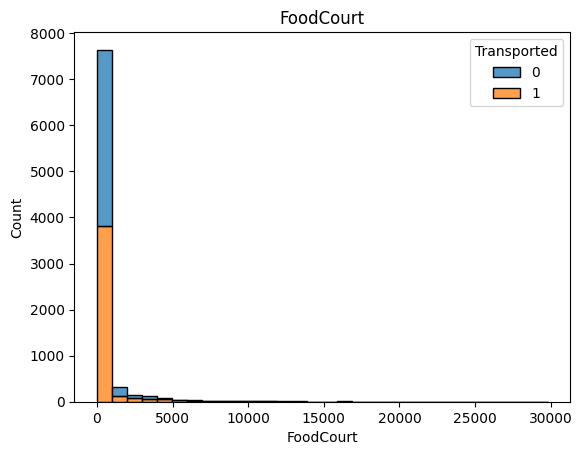


             FoodCourt_Mean
Transported                
0                382.615930
1                532.691984



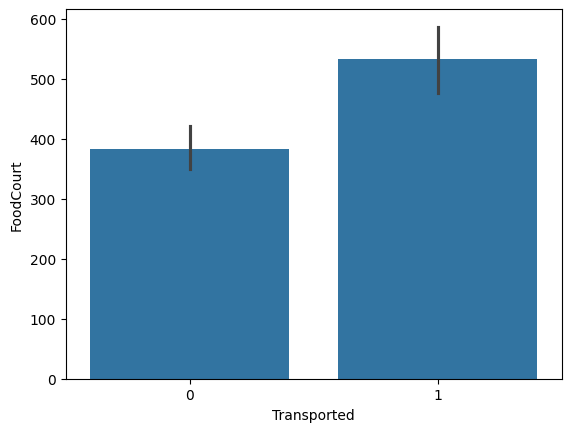

################################################################################
ShoppingMall
count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          5.000000
80%         97.000000
90%        619.600000
95%        927.800000
99%       2333.440000
max      23492.000000
Name: ShoppingMall, dtype: float64


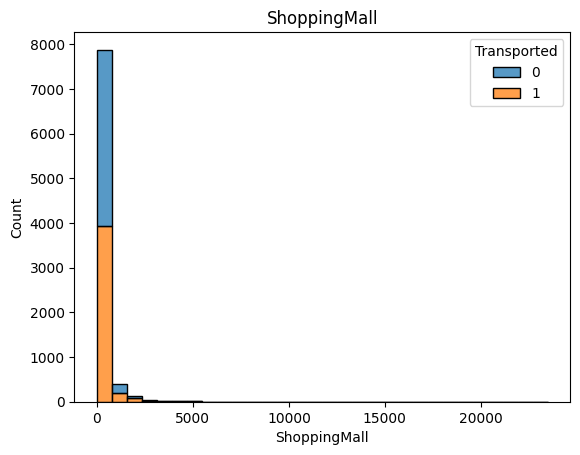


             ShoppingMall_Mean
Transported                   
0                   167.566217
1                   179.829972



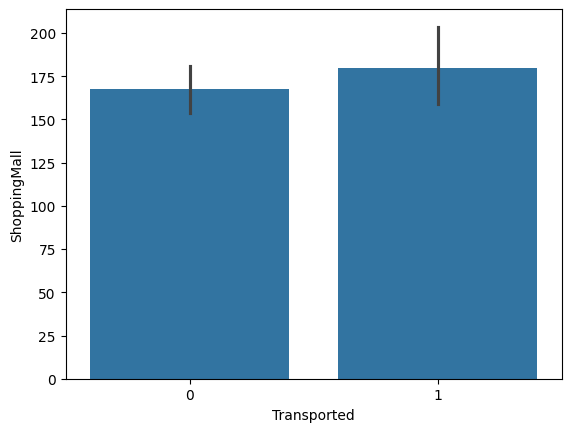

################################################################################
Spa
count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%         15.000000
80%        179.200000
90%        732.000000
95%       1607.100000
99%       5390.100000
max      22408.000000
Name: Spa, dtype: float64


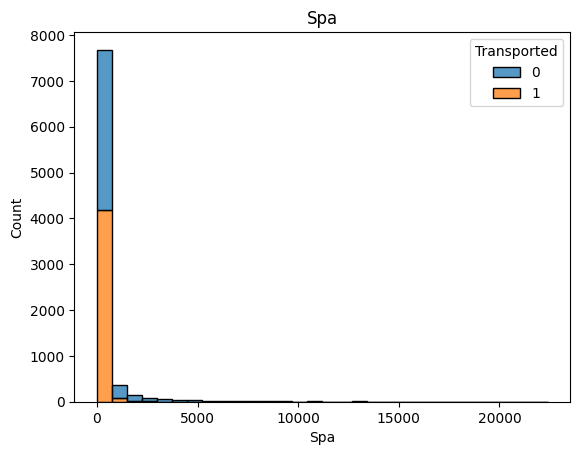


               Spa_Mean
Transported            
0            564.382666
1             61.675531



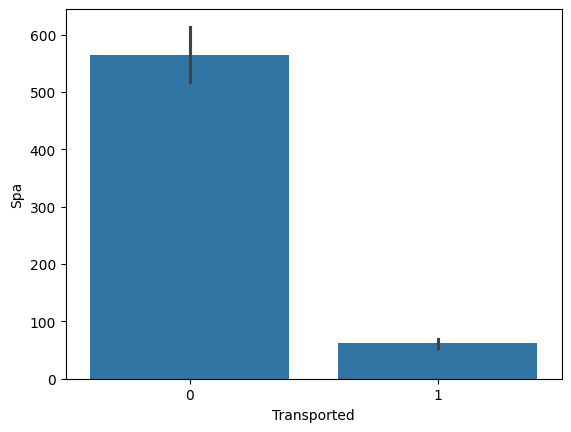

################################################################################
VRDeck
count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          9.000000
80%        156.200000
90%        732.600000
95%       1534.200000
99%       5646.680000
max      24133.000000
Name: VRDeck, dtype: float64


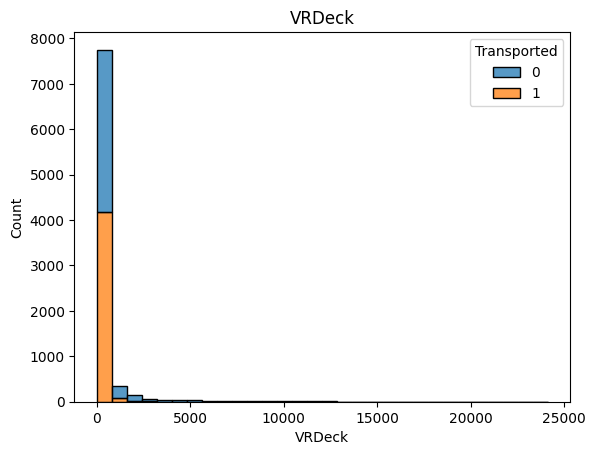


             VRDeck_Mean
Transported             
0             543.629822
1              69.148131



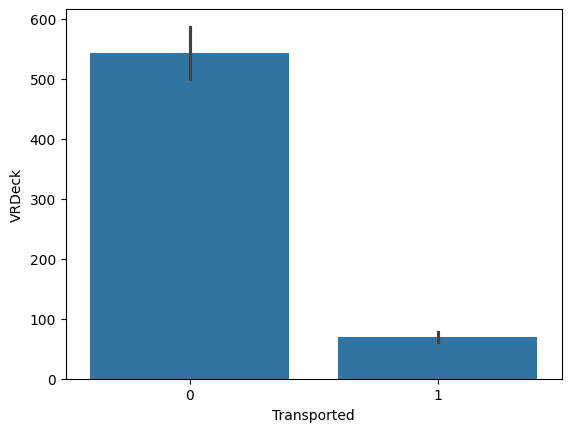

################################################################################


In [18]:
for col in anal_num:
    num_col_anal(train_df, label, col, plot=True)

In [19]:
print(train_df['CryoSleep'].isnull().sum(), test_df['CryoSleep'].isnull().sum())

217 93


In [20]:
train_df.groupby("CryoSleep")[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
0.0,350.146772,713.004316,270.586504,486.09294,475.716165
1.0,0.000000,0.000000,0.000000,0.00000,0.000000


In [21]:
cond1 = (train_df['RoomService'].notnull() & train_df['RoomService'] > 0)
cond2 = (train_df['FoodCourt'].notnull() & train_df['FoodCourt'] > 0)
cond3 = (train_df['ShoppingMall'].notnull() & train_df['ShoppingMall'] > 0)
cond4 = (train_df['Spa'].notnull() & train_df['Spa'] > 0)
cond5 = (train_df['VRDeck'].notnull() & train_df['VRDeck'] > 0)

cond6 = (test_df['RoomService'].notnull() & test_df['RoomService'] > 0)
cond7 = (test_df['FoodCourt'].notnull() & test_df['FoodCourt'] > 0)
cond8 = (test_df['ShoppingMall'].notnull() & test_df['ShoppingMall'] > 0)
cond9 = (test_df['Spa'].notnull() & test_df['Spa'] > 0)
cond10 = (test_df['VRDeck'].notnull() & test_df['VRDeck'] > 0)

In [22]:
train_df['Active'] = (cond1 | cond2 | cond3 | cond4 | cond5)
test_df['Active'] = (cond6 | cond7 | cond8 | cond9 | cond10)

train_df.loc[train_df['Active'] == True, 'CryoSleep'] = train_df.loc[train_df['Active'] == True, 'CryoSleep'].fillna(0)
test_df.loc[test_df['Active'] == True, 'CryoSleep'] = test_df.loc[test_df['Active'] == True, 'CryoSleep'].fillna(0)

train_df.loc[train_df['Active' ] == False, 'CryoSleep'] = train_df.loc[train_df['Active'] == False].fillna(1)
test_df.loc[test_df['Active'] == False, 'CryoSleep'] = test_df.loc[test_df['Active'] == False].fillna(1)

In [23]:
print(train_df['CryoSleep'].isnull().sum(), test_df['CryoSleep'].isnull().sum())

0 0


In [24]:
train_df.loc[train_df['CryoSleep'] == 1, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df.loc[train_df['CryoSleep'] == 1, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

test_df.loc[test_df['CryoSleep'] == 1, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test_df.loc[test_df['CryoSleep'] == 1, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [25]:
train_df['Service'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
test_df['Service'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']

In [26]:
train_df.groupby(['CryoSleep', 'VIP'])[['RoomService', 'FoodCourt', 'ShoppingMall', "Spa", "VRDeck"]].mean()

RoomService    FoodCourt  ShoppingMall         Spa       VRDeck
CryoSleep VIP                                                                 
0.0       0.0   342.470383   671.908367    272.940252  475.978219   446.142079
          1.0   530.775862  2020.803468    277.797688  846.666667  1375.982857
1.0       0.0     0.000000     0.000000      0.000000    0.000000     0.000000
          1.0     0.000000     0.000000      0.000000    0.000000     0.000000

In [27]:
train_df['VIP'].fillna(0.1, inplace=True)
test_df['VIP'].fillna(0.1, inplace=True)

In [28]:
train_df['RoomService'].fillna(train_df.groupby(['CryoSleep','VIP'])['RoomService'].transform('median'), inplace=True)
test_df['RoomService'].fillna(test_df.groupby(['CryoSleep','VIP'])['RoomService'].transform('median'), inplace=True)

train_df['FoodCourt'].fillna(train_df.groupby(['CryoSleep','VIP'])['FoodCourt'].transform('median'), inplace=True)
test_df['FoodCourt'].fillna(test_df.groupby(['CryoSleep','VIP'])['FoodCourt'].transform('median'), inplace=True)

train_df['ShoppingMall'].fillna(train_df.groupby(['CryoSleep','VIP'])['ShoppingMall'].transform('median'), inplace=True)
test_df['ShoppingMall'].fillna(test_df.groupby(['CryoSleep','VIP'])['ShoppingMall'].transform('median'), inplace=True)

train_df['Spa'].fillna(train_df.groupby(['CryoSleep','VIP'])['Spa'].transform('median'), inplace=True)
test_df['Spa'].fillna(test_df.groupby(['CryoSleep','VIP'])['Spa'].transform('median'), inplace=True)

train_df['VRDeck'].fillna(train_df.groupby(['CryoSleep','VIP'])['VRDeck'].transform('median'), inplace=True)
test_df['VRDeck'].fillna(test_df.groupby(['CryoSleep','VIP'])['VRDeck'].transform('median'), inplace=True)

train_df['Service'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
test_df['Service'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']

In [29]:
train_df['HomePlanet'].fillna("Unknown", inplace=True)
test_df['HomePlanet'].fillna("Unknown", inplace=True)

train_df['Destination'].fillna("Unknown", inplace=True)
test_df['Destination'].fillna("Unknown", inplace=True)

print(train_df['HomePlanet'].isnull().sum(), train_df['Destination'].isnull().sum())

0 0


In [30]:
train_df[['Deck', 'Cabin_num', 'Side']] = train_df['Cabin'].str.split("/", expand=True)
test_df[['Deck', 'Cabin_num', 'Side']] = test_df['Cabin'].str.split("/", expand=True)
train_df['Deck'] = train_df['Deck'].fillna("Unknown")
test_df['Deck'] = test_df['Deck'].fillna("Unknown")
train_df['Side'] = train_df['Side'].fillna("Unknown")
test_df['Side'] = test_df['Side'].fillna("Unknown")

In [31]:
train_df[['Age', 'VIP', 'CryoSleep']].corr()['Age'].sort_values()

CryoSleep   -0.078192
VIP          0.090628
Age          1.000000
Name: Age, dtype: float64

In [32]:
train_df.groupby("VIP")['Age'].mean()

VIP
0.0    28.639611
0.1    27.923858
1.0    37.449495
Name: Age, dtype: float64

In [33]:
train_df.groupby('HomePlanet')['Age'].mean()

HomePlanet
Earth      26.068232
Europa     34.419664
Mars       29.297203
Unknown    28.793970
Name: Age, dtype: float64

In [34]:
train_df.groupby("Destination")['Age'].mean()

Destination
55 Cancri e      29.305776
PSO J318.5-22    27.529412
TRAPPIST-1e      28.817522
Unknown          30.122905
Name: Age, dtype: float64

In [35]:
train_df['Age'].fillna(train_df.groupby(["HomePlanet"])['Age'].transform('median'), inplace=True)
test_df['Age'].fillna(train_df.groupby(["HomePlanet"])['Age'].transform('median'), inplace=True)


In [36]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Active            0
Service           0
Deck              0
Cabin_num       199
Side              0
dtype: int64

In [37]:
!pip install scikit-learn

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
col_cat = ['HomePlanet', 'Deck', 'Side', "Destination"]
col_num = ['CryoSleep', "Age", "VIP",  "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Service"]
col_y = "Transported"

X_train = train_df[col_num + col_cat]
y_train = train_df[col_y]
X_test = test_df[col_num + col_cat]

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[col_cat])
X_train_ohe = enc.transform(X_train[col_cat])
X_test_ohe = enc.transform(X_test[col_cat])

X_train_cat_fin = pd.DataFrame(data=X_train_ohe.todense(), index=X_train.index, columns=enc.get_feature_names_out(col_cat))
X_test_cat_fin = pd.DataFrame(data=X_test_ohe.todense(), index=X_test.index, columns=enc.get_feature_names_out(col_cat))

X_train = pd.concat([X_train[col_num], X_train_cat_fin], axis=1)
X_test = pd.concat([X_test[col_num], X_test_cat_fin], axis=1)


In [40]:
corelations = pd.concat([X_train, y_train], axis=1).corr()[col_y].sort_values()[::-1]
print(corelations)

Transported                  1.000000
CryoSleep                    0.467230
HomePlanet_Europa            0.176916
Deck_B                       0.144733
Destination_55 Cancri e      0.108722
Deck_C                       0.108193
Side_S                       0.101455
FoodCourt                    0.045668
HomePlanet_Mars              0.019544
Deck_G                       0.016269
ShoppingMall                 0.009376
HomePlanet_Unknown           0.002712
Destination_Unknown          0.000547
Destination_PSO J318.5-22    0.000092
Side_Unknown                -0.000340
Deck_Unknown                -0.000340
Deck_A                      -0.002623
Deck_T                      -0.014568
Deck_D                      -0.034046
VIP                         -0.036890
Age                         -0.072825
Deck_F                      -0.087753
Destination_TRAPPIST-1e     -0.094700
Deck_E                      -0.097965
Side_P                      -0.101397
HomePlanet_Earth            -0.169019
Service     

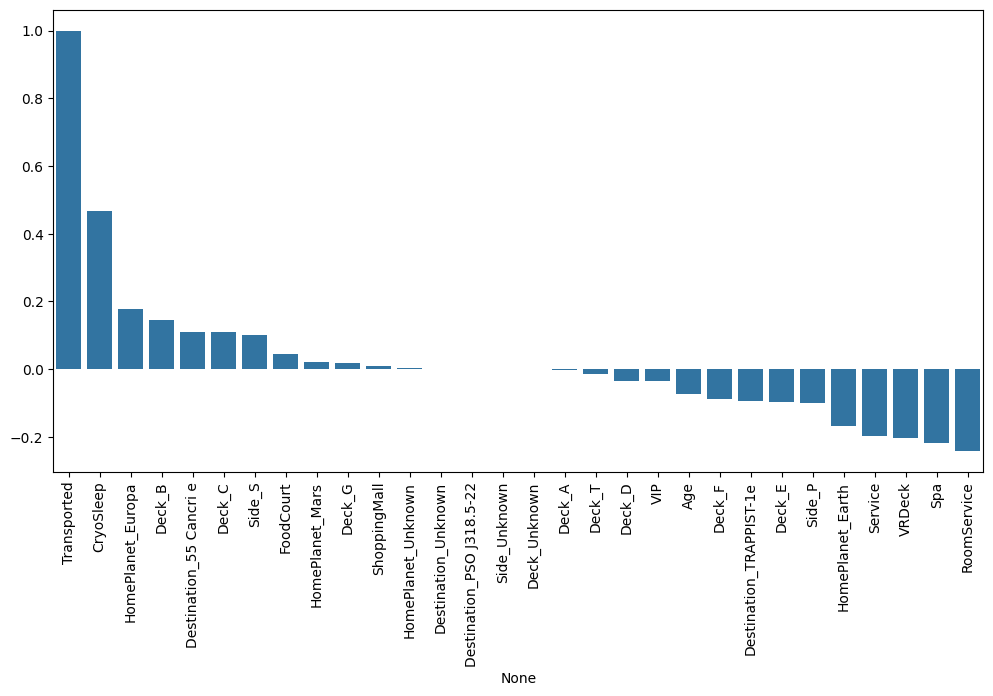

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x=corelations.index, y=corelations.values)
plt.xticks(rotation=90)
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Feature_Importances_ // Service, VIP, Dick, Destination
col_cat = ['HomePlanet', 'Deck', 'Side']
col_num = ['CryoSleep', 'Age', "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
col_y = "Transported"

X_train = train_df[col_num + col_cat]
y_train = train_df[col_y]
X_test = test_df[col_num + col_cat]

enc = OneHotEncoder(handle_unknown='ignore', drop="first")
enc.fit(X_train[col_cat])
X_train_ohe = enc.transform(X_train[col_cat])
X_test_ohe = enc.transform(X_test[col_cat])

X_train_cat_fin = pd.DataFrame(data=X_train_ohe.todense(), index=X_train.index, columns=enc.get_feature_names_out(col_cat))
X_test_cat_fin = pd.DataFrame(data=X_test_ohe.todense(), index=X_test.index, columns=enc.get_feature_names_out(col_cat))

X_train = pd.concat([X_train[col_num], X_train_cat_fin], axis=1)
X_test = pd.concat([X_test[col_num], X_test_cat_fin], axis=1)

In [44]:
scaler = MinMaxScaler()
scaler.fit(X_train[col_num])
X_train.loc[:, col_num] = scaler.transform(X_train[col_num])
X_test.loc[:, col_num] = scaler.transform(X_test[col_num])

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
model = GradientBoostingClassifier(random_state=42)
param_grid =  {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.05, 0.2], 'max_depth': [3, 5, 7]}
model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

In [47]:
model.fit(X_train, y_train)
print(model.best_params_)
print(model.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=150; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_e

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Deck_T'),
  Text(1, 0, 'Deck_D'),
  Text(2, 0, 'Deck_B'),
  Text(3, 0, 'HomePlanet_Unknown'),
  Text(4, 0, 'Deck_Unknown'),
  Text(5, 0, 'Deck_F'),
  Text(6, 0, 'Side_Unknown'),
  Text(7, 0, 'Deck_C'),
  Text(8, 0, 'HomePlanet_Mars'),
  Text(9, 0, 'HomePlanet_Europa'),
  Text(10, 0, 'Deck_E'),
  Text(11, 0, 'Side_S'),
  Text(12, 0, 'ShoppingMall'),
  Text(13, 0, 'Age'),
  Text(14, 0, 'RoomService'),
  Text(15, 0, 'Deck_G'),
  Text(16, 0, 'Spa'),
  Text(17, 0, 'FoodCourt'),
  Text(18, 0, 'VRDeck'),
  Text(19, 0, 'CryoSleep')])

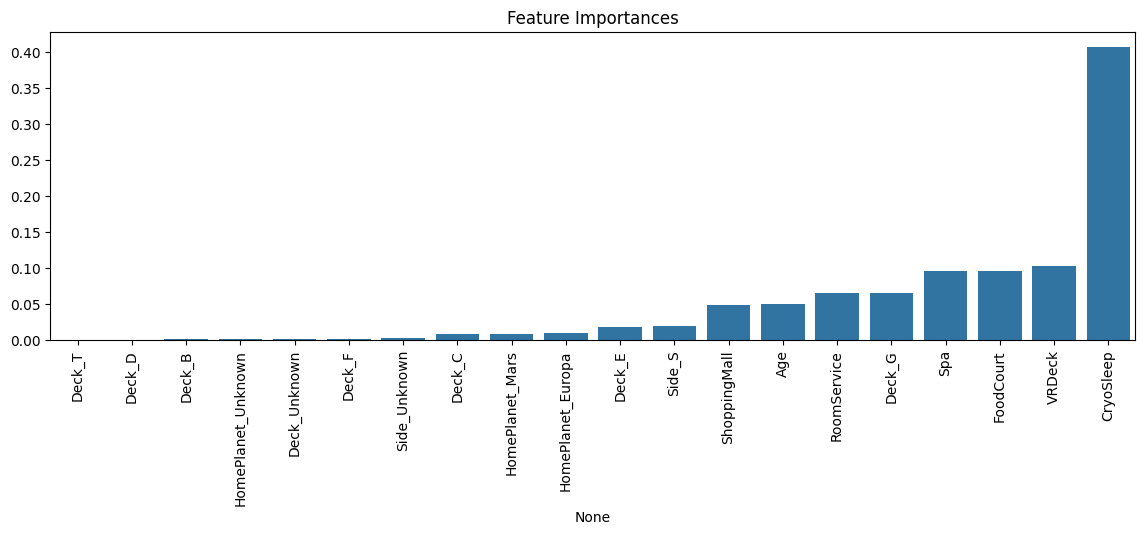

In [52]:
# GridSearchCV
feat_imp = pd.Series(
    model.best_estimator_.feature_importances_, 
    index=X_train.columns
).sort_values()
plt.figure(figsize=(14, 4))
ax = sns.barplot(x=feat_imp.index, y=feat_imp.values)
plt.title("Feature Importances")
plt.xticks(rotation=90)

In [55]:
final_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=50
)
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test).astype(bool)
output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': pred})

In [56]:
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
